# Deep learning model training
- 다층 퍼셉트론을 이용한 지하철 하차인원 예측 모델링

## 데이터 전처리
- 학습 데이터 : 2021, 2022   
- 검증 데이터 : 2023

In [1]:
import pandas as pd
import numpy as np
import pickle

# df_2023 = pd.read_csv('data/learningdata2/testdata_2023.csv',encoding='utf-8')

df_2022 = pd.read_csv('data/learningdata2/testdata_2022.csv',encoding='utf-8')
df_2021 = pd.read_csv('data/learningdata2/testdata_2021.csv',encoding='utf-8')

In [2]:
df_2022.head(10)

,일시,호선,역번호,역명,주말,요일,통과호선수,미세먼지(pm10),시간,하차인원,공휴일여부,강수량(mm),평균기온,최저기온,최고기온
0,2022-01-01,1,150,서울역,1,5,4,29.0,6,560,1,0.0,-4.3,-10.2,2.3
1,2022-01-01,1,151,시청,1,5,2,29.0,6,195,1,0.0,-4.3,-10.2,2.3
2,2022-01-01,1,152,종각,1,5,1,28.0,6,136,1,0.0,-4.3,-10.2,2.3
3,2022-01-01,1,153,종로3가,1,5,3,28.0,6,139,1,0.0,-4.3,-10.2,2.3
4,2022-01-01,1,154,종로5가,1,5,1,28.0,6,80,1,0.0,-4.3,-10.2,2.3
5,2022-01-01,1,155,동대문,1,5,2,28.0,6,59,1,0.0,-4.3,-10.2,2.3
6,2022-01-01,1,156,신설동,1,5,3,29.0,6,84,1,0.0,-4.3,-10.2,2.3
7,2022-01-01,1,157,제기동,1,5,1,29.0,6,82,1,0.0,-4.3,-10.2,2.3
8,2022-01-01,1,158,청량리(서울시립대입구),1,5,1,29.0,6,129,1,0.0,-4.3,-10.2,2.3
9,2022-01-01,1,159,동묘앞,1,5,2,28.0,6,77,1,0.0,-4.3,-10.2,2.3


사용 데이터 설정 : 역번호, 호선, 요일(1~7), 통과 호선수, 미세먼지, 시간, 공휴일 여부, 강수량, 최저기온, 평균기온, 최고기온

In [3]:
def adjustDf(temp_df):
	return_df = temp_df[['호선','역번호','요일','통과호선수','미세먼지(pm10)','시간','하차인원','공휴일여부','강수량(mm)','최저기온','평균기온','최고기온']]
	# 결측치 제거
	return_df = return_df.dropna()
	# 시간 23시 제거
	return_df = return_df[return_df['시간'] != 23]
	# 하차인원 로그변환
	return_df['하차인원'] = return_df['하차인원'].apply(np.log1p)
	# Scaler
	columns_to_scale = ['미세먼지(pm10)', '평균기온', '최저기온', '최고기온', '강수량(mm)']
	with open('../models/scaler.pkl', 'rb') as f:
		loaded_scaler = pickle.load(f)
	return_df[columns_to_scale] = loaded_scaler.transform(return_df[columns_to_scale])
	return return_df

In [4]:
adjust_df_2021 = adjustDf(df_2021)
adjust_df_2022 = adjustDf(df_2022)

In [5]:
train_df = pd.concat([adjust_df_2021,adjust_df_2022], ignore_index=True)

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424735 entries, 0 to 3424734
Data columns (total 12 columns):
 #   Column      Dtype  
---  ------      -----  
 0   호선          int64  
 1   역번호         int64  
 2   요일          int64  
 3   통과호선수       int64  
 4   미세먼지(pm10)  float64
 5   시간          int64  
 6   하차인원        float64
 7   공휴일여부       int64  
 8   강수량(mm)     float64
 9   최저기온        float64
 10  평균기온        float64
 11  최고기온        float64
dtypes: float64(6), int64(6)
memory usage: 313.5 MB


In [6]:
#num_stations = len(np.unique(train_df['역번호']))
#num_stations

In [7]:
'''
from sklearn.preprocessing import StandardScaler

# 표준화할 컬럼 선택
columns_to_scale = ['미세먼지(pm10)', '평균기온', '최저기온', '최고기온', '강수량(mm)']

# 표준화 진행
scaler = StandardScaler()
train_df[columns_to_scale] = scaler.fit_transform(train_df[columns_to_scale])

import pickle
# Scaler 저장
with open('../models/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
'''

"\nfrom sklearn.preprocessing import StandardScaler\n\n# 표준화할 컬럼 선택\ncolumns_to_scale = ['미세먼지(pm10)', '평균기온', '최저기온', '최고기온', '강수량(mm)']\n\n# 표준화 진행\nscaler = StandardScaler()\ntrain_df[columns_to_scale] = scaler.fit_transform(train_df[columns_to_scale])\n\nimport pickle\n# Scaler 저장\nwith open('../models/scaler.pkl', 'wb') as f:\n    pickle.dump(scaler, f)\n"

## 딥러닝 모델 학습

In [8]:
train_df.head(10)

,호선,역번호,요일,통과호선수,미세먼지(pm10),시간,하차인원,공휴일여부,강수량(mm),최저기온,평균기온,최고기온
0,1,150,4,4,-0.174910,6,5.874931,1,-0.26813,-1.739187,-1.653162,-1.568223
1,1,151,4,2,-0.174910,6,4.983607,1,-0.26813,-1.739187,-1.653162,-1.568223
2,1,152,4,1,-0.174910,6,4.762174,1,-0.26813,-1.739187,-1.653162,-1.568223
3,1,153,4,3,-0.174910,6,4.418841,1,-0.26813,-1.739187,-1.653162,-1.568223
4,1,154,4,1,-0.174910,6,4.127134,1,-0.26813,-1.739187,-1.653162,-1.568223
5,1,155,4,2,-0.174910,6,4.143135,1,-0.26813,-1.739187,-1.653162,-1.568223
6,1,156,4,3,-0.408427,6,4.219508,1,-0.26813,-1.739187,-1.653162,-1.568223
7,1,157,4,1,-0.408427,6,4.330733,1,-0.26813,-1.739187,-1.653162,-1.568223
8,1,158,4,1,-0.408427,6,4.700480,1,-0.26813,-1.739187,-1.653162,-1.568223
9,1,159,4,2,-0.174910,6,3.988984,1,-0.26813,-1.739187,-1.653162,-1.568223


1. MLP 모델
2. RNN, LSTM, GRU
3. Attention mechanism

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [10]:
print(torch.device('mps' if torch.backends.mps.is_built() else 'cpu'))

mps


In [11]:
X = (train_df.drop(['하차인원', '역번호'], axis=1)).values
X_station = (train_df[['역번호']]).values
y = (train_df[['하차인원']]).values

X_train, X_val, X_station_train, X_station_val, y_train, y_val = train_test_split(X, X_station, y, test_size=0.1, random_state=42)

In [12]:
print(X_train.shape, X_val.shape, X_station_train.shape, X_station_val.shape, y_train.shape, y_val.shape)

(3082261, 10) (342474, 10) (3082261, 1) (342474, 1) (3082261, 1) (342474, 1)


In [13]:
# PyTorch 텐서로 변환
X_train_tensor = torch.FloatTensor(X_train)
X_station_train_tensor = torch.LongTensor(X_station_train)  # 역번호는 범주형이므로 LongTensor로 변환
y_train_tensor = torch.FloatTensor(y_train)

X_val_tensor = torch.FloatTensor(X_val)
X_station_val_tensor = torch.LongTensor(X_station_val)
y_val_tensor = torch.FloatTensor(y_val)

# 데이터셋 및 데이터로더 구성
train_dataset = torch.utils.data.TensorDataset(X_train_tensor, X_station_train_tensor, y_train_tensor)
val_dataset = torch.utils.data.TensorDataset(X_val_tensor, X_station_val_tensor, y_val_tensor)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=32)

In [14]:
class MLPWithEmbedding(nn.Module):
    def __init__(self, num_stations, embedding_dim, input_size):
        super(MLPWithEmbedding, self).__init__()
        # 역번호에 대한 임베딩 레이어
        self.embedding = nn.Embedding(num_stations, embedding_dim)
        
        # 임베딩 레이어와 다른 연속형 피처를 결합한 후 MLP를 구성
        self.fc1 = nn.Linear(embedding_dim + input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
    
    def forward(self, x_numeric, x_station):
        # 역번호 임베딩 처리
        x_station_embedded = self.embedding(x_station)
        x_station_embedded = x_station_embedded.squeeze(1)  # 임베딩 결과의 차원 조정
        
        # 임베딩된 역번호와 연속형 피처 결합
        x = torch.cat([x_numeric, x_station_embedded], dim=1)
        
        # MLP 모델 진행
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [14]:
class MLPWithEmbedding2(nn.Module):
    def __init__(self, num_stations, embedding_dim, input_size):
        super(MLPWithEmbedding2, self).__init__()
        
        # 역번호에 대한 임베딩 레이어
        self.embedding = nn.Embedding(num_stations, embedding_dim)
        
        # MLP 레이어 구성 (뉴런 수 증가, 레이어 추가)
        self.fc1 = nn.Linear(embedding_dim + input_size, 128)  # 첫 번째 레이어: 뉴런 수 증가
        self.fc2 = nn.Linear(128, 64)  # 두 번째 레이어
        self.fc3 = nn.Linear(64, 32)  # 세 번째 레이어 (추가된 레이어)
        self.fc4 = nn.Linear(32, 1)  # 출력 레이어

        # 활성화 함수 및 드롭아웃 설정
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.2)  # 드롭아웃 확률 30%
        
        # 배치 정규화 설정
        self.batch_norm1 = nn.BatchNorm1d(128)
        self.batch_norm2 = nn.BatchNorm1d(64)
        self.batch_norm3 = nn.BatchNorm1d(32)
    
    def forward(self, x_numeric, x_station):
        # 역번호 임베딩 처리
        x_station_embedded = self.embedding(x_station)
        x_station_embedded = x_station_embedded.squeeze(1)  # 임베딩 결과의 차원 조정
        
        # 임베딩된 역번호와 연속형 피처 결합
        x = torch.cat([x_numeric, x_station_embedded], dim=1)
        
        # MLP 모델 진행 (배치 정규화 및 드롭아웃 추가)
        x = self.fc1(x)
        x = self.batch_norm1(x)  # 배치 정규화
        x = self.relu(x)
        x = self.dropout(x)  # 드롭아웃

        x = self.fc2(x)
        x = self.batch_norm2(x)  # 배치 정규화
        x = self.relu(x)
        x = self.dropout(x)  # 드롭아웃

        x = self.fc3(x)
        x = self.batch_norm3(x)  # 배치 정규화
        x = self.relu(x)
        
        x = self.fc4(x)  # 최종 출력 레이어

        return x

### 모델 학습

In [15]:
from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter()

num_stations = np.max(X_station_train) + 1

# 모델 초기화
embedding_dim = 8  # 임베딩 벡터의 차원
input_size = X_train.shape[1]  # 연속형 피처 수
model = MLPWithEmbedding(num_stations=num_stations, embedding_dim=embedding_dim, input_size=input_size)

# 손실 함수 및 옵티마이저 정의
criterion = nn.MSELoss()  # 회귀 문제이므로 MSE 사용
optimizer = optim.Adam(model.parameters(), lr=0.0005)

device = torch.device('mps' if torch.backends.mps.is_built() else 'cpu')
model = model.to(device)

# 학습 및 검증
num_epochs = 100
train_losses = []
val_losses = []

y_train_tensor = y_train_tensor.view(-1, 1)
y_val_tensor = y_val_tensor.view(-1, 1)

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    
    for inputs_numeric, inputs_station, targets in train_loader:
        inputs_numeric = inputs_numeric.to(device)
        inputs_station = inputs_station.to(device)
        targets = targets.to(device).view(-1, 1)  # 타겟 텐서 크기 변환
        
        optimizer.zero_grad()
        outputs = model(inputs_numeric, inputs_station)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs_numeric.size(0)
    
    train_loss = running_loss / len(train_loader.dataset)
    
    # TensorBoard에 학습 손실 기록
    writer.add_scalar('Training Loss', train_loss, epoch)

    # 검증
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs_numeric, inputs_station, targets in val_loader:
            inputs_numeric = inputs_numeric.to(device)
            inputs_station = inputs_station.to(device)
            targets = targets.to(device).view(-1, 1)  # 타겟 텐서 크기 변환
            
            outputs = model(inputs_numeric, inputs_station)
            loss = criterion(outputs, targets)
            val_loss += loss.item() * inputs_numeric.size(0)
    
    val_loss = val_loss / len(val_loader.dataset)
    
    # TensorBoard에 검증 손실 기록
    writer.add_scalar('Validation Loss', val_loss, epoch)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}')

# 학습이 끝난 후 TensorBoard 기록 종료
writer.close()


Epoch [1/100], Train Loss: 0.1704, Validation Loss: 0.0801
Epoch [2/100], Train Loss: 0.0745, Validation Loss: 0.0664
Epoch [3/100], Train Loss: 0.0638, Validation Loss: 0.0652
Epoch [4/100], Train Loss: 0.0571, Validation Loss: 0.0535
Epoch [5/100], Train Loss: 0.0537, Validation Loss: 0.0511
Epoch [6/100], Train Loss: 0.0518, Validation Loss: 0.0501
Epoch [7/100], Train Loss: 0.0507, Validation Loss: 0.0509
Epoch [8/100], Train Loss: 0.0499, Validation Loss: 0.0502
Epoch [9/100], Train Loss: 0.0491, Validation Loss: 0.0496
Epoch [10/100], Train Loss: 0.0485, Validation Loss: 0.0470
Epoch [11/100], Train Loss: 0.0481, Validation Loss: 0.0492
Epoch [12/100], Train Loss: 0.0477, Validation Loss: 0.0466
Epoch [13/100], Train Loss: 0.0473, Validation Loss: 0.0468
Epoch [14/100], Train Loss: 0.0470, Validation Loss: 0.0468
Epoch [15/100], Train Loss: 0.0466, Validation Loss: 0.0468
Epoch [16/100], Train Loss: 0.0464, Validation Loss: 0.0494
Epoch [17/100], Train Loss: 0.0461, Validation Lo

In [16]:
# 모델의 가중치만 저장하는 코드
torch.save(model.state_dict(), '../models/model_weights_1_opti.pth')

## 2023년 데이터 에측 및 정확도 확인

In [26]:
df_2023 = pd.read_csv('data/learningdata2/testdata_2023.csv',encoding='utf-8')

In [27]:
class MLPWithEmbedding(nn.Module):
	def __init__(self, num_stations, embedding_dim, input_size):
		super(MLPWithEmbedding, self).__init__()
		# 역번호에 대한 임베딩 레이어
		self.embedding = nn.Embedding(num_stations, embedding_dim)
		
		# 임베딩 레이어와 다른 연속형 피처를 결합한 후 MLP를 구성
		self.fc1 = nn.Linear(embedding_dim + input_size, 64)
		self.fc2 = nn.Linear(64, 32)
		self.fc3 = nn.Linear(32, 1)
		self.relu = nn.ReLU()
	
	def forward(self, x_numeric, x_station):
		# 역번호 임베딩 처리
		x_station_embedded = self.embedding(x_station)
		x_station_embedded = x_station_embedded.squeeze(1)  # 임베딩 결과의 차원 조정
		
		# 임베딩된 역번호와 연속형 피처 결합
		x = torch.cat([x_numeric, x_station_embedded], dim=1)
		
		# MLP 모델 진행
		x = self.relu(self.fc1(x))
		x = self.relu(self.fc2(x))
		x = self.fc3(x)
		return x

# 모델 초기화
num_stations = 2829  # 예시로 100개의 역번호가 있다고 가정
embedding_dim = 8  # 임베딩 벡터의 차원
input_size = 10  # 연속형 피처 수 (예시)

model = MLPWithEmbedding(num_stations=num_stations, embedding_dim=embedding_dim, input_size=input_size)

# 손실 함수 및 옵티마이저 정의
criterion = nn.MSELoss()  # 회귀 문제이므로 MSE 사용
optimizer = optim.Adam(model.parameters(), lr=0.001)

device = torch.device('mps' if torch.backends.mps.is_built() else 'cpu')
model = model.to(device)

In [28]:
# 2023년 데이터 전처리
adjust_df_2023 = adjustDf(df_2023)

# 2023년 데이터 예측
X_2023 = (adjust_df_2023.drop(['하차인원', '역번호'], axis=1)).values
X_station_2023 = (adjust_df_2023[['역번호']]).values
y_2023 = (adjust_df_2023['하차인원']).values

X_2023_tensor = torch.FloatTensor(X_2023)
X_station_2023_tensor = torch.LongTensor(X_station_2023)
y_2023_tensor = torch.FloatTensor(y_2023).view(-1, 1)

# 모델을 평가 모드로 전환
model.eval()

# 저장된 모델 가중치 로드
model.load_state_dict(torch.load('../models/model_weights_1.pth',weights_only=True))

# 예측 수행
with torch.no_grad():
	X_2023_tensor = X_2023_tensor.to(device)
	X_station_2023_tensor = X_station_2023_tensor.to(device)
	y_2023_tensor = y_2023_tensor.to(device)
	
	predictions = model(X_2023_tensor, X_station_2023_tensor)
	mse = criterion(predictions, y_2023_tensor).item()

print(f'Mean Squared Error on 2023 data: {mse:.4f}')

Mean Squared Error on 2023 data: 0.7322


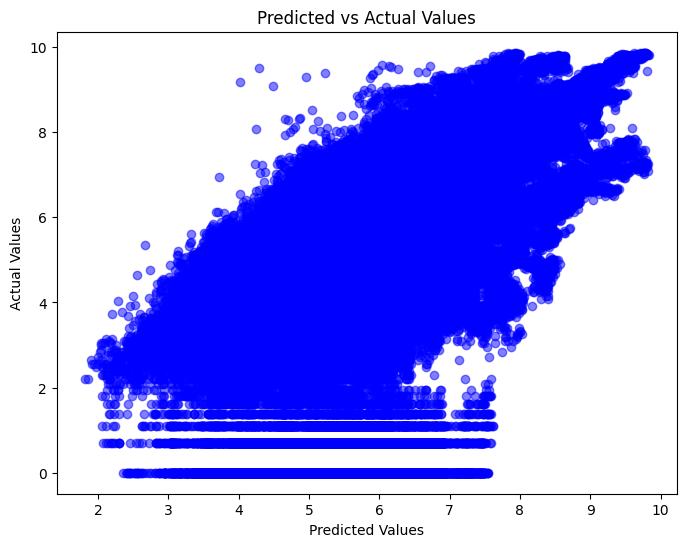

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(predictions.cpu().numpy(), y_2023_tensor.cpu().numpy(), alpha=0.5, c='blue')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Predicted vs Actual Values')
plt.show()

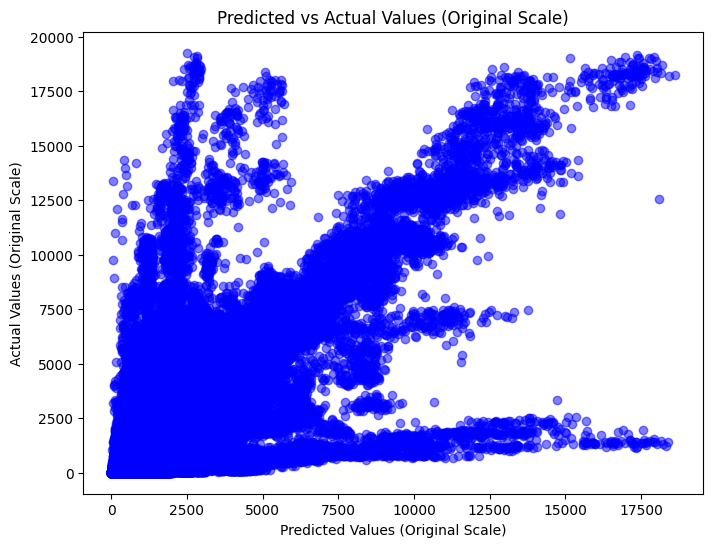

In [30]:
import numpy as np

import matplotlib.pyplot as plt

# log1p 변환된 값을 원래 값으로 되돌리기
y_2023_original = np.expm1(y_2023_tensor.cpu().numpy())
predictions_original = np.expm1(predictions.cpu().numpy())

# 그래프 그리기
plt.figure(figsize=(8, 6))
plt.scatter(predictions_original, y_2023_original, alpha=0.5, c='blue')
plt.xlabel('Predicted Values (Original Scale)')
plt.ylabel('Actual Values (Original Scale)')
plt.title('Predicted vs Actual Values (Original Scale)')
plt.show()